The Benchmark Dataset is applied as an example. Firstly, we need to initialize the dataset.

In [1]:
from SSVEPAnalysisToolbox.datasets import BenchmarkDataset
from SSVEPAnalysisToolbox.utils.benchmarkpreprocess import (
    preprocess, filterbank
)
dataset = BenchmarkDataset(path = '2016_Tsinghua_SSVEP_database')
dataset.regist_preprocess(preprocess)
dataset.regist_filterbank(filterbank)

We provide 2 types of methods for computing the SNR. The 1st method directly uses the FFT and use the spectrum amplitudes to calculate the SNR. In this example, we consider first 5 harmonic components and first 1 second signal length. This example only considers 9 occipital channels.

In [2]:
harmonic_num = 5
sig_len = 1
from SSVEPAnalysisToolbox.utils.benchmarkpreprocess import suggested_ch
from SSVEPAnalysisToolbox.utils.algsupport import nextpow2
snr = dataset.get_snr(Nh = harmonic_num, display_progress = True, 
                    sig_len = sig_len,
                    remove_break = False, remove_pre_and_latency = False,
                    NFFT = 2 ** nextpow2(10*dataset.srate)) 
snr = snr[:,:,:,suggested_ch()]

100.000%|████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [Time: 06:24<00:00]


Then, we can plot the histogram of these SNR values.

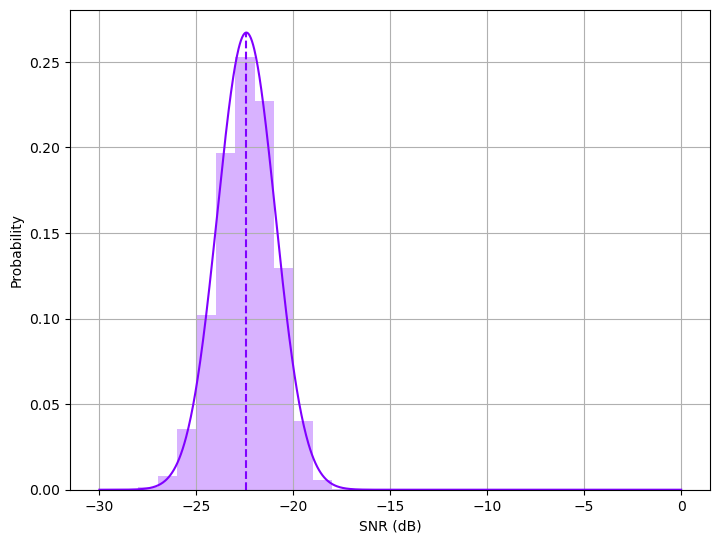

In [3]:
from SSVEPAnalysisToolbox.evaluator import (
    hist, gen_colors
)
hist_bins = list(range(-30,0+1))
hist_range = (-30, 0)
color = gen_colors(1)
fig, ax = hist(snr, bins = hist_bins, range = hist_range, density = True,
            color = color, alpha = 0.3, fit_line = True, line_points = 1000,
            x_label = 'SNR (dB)',
            y_label = 'Probability',
            grid = True)
fig.savefig('res/SNR_fft_benchmark.jpg', bbox_inches='tight', dpi=300)

The 2nd method use the sine-cosine to compute the multi-channel SNR. 

100.000%|████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [Time: 07:35<00:00]


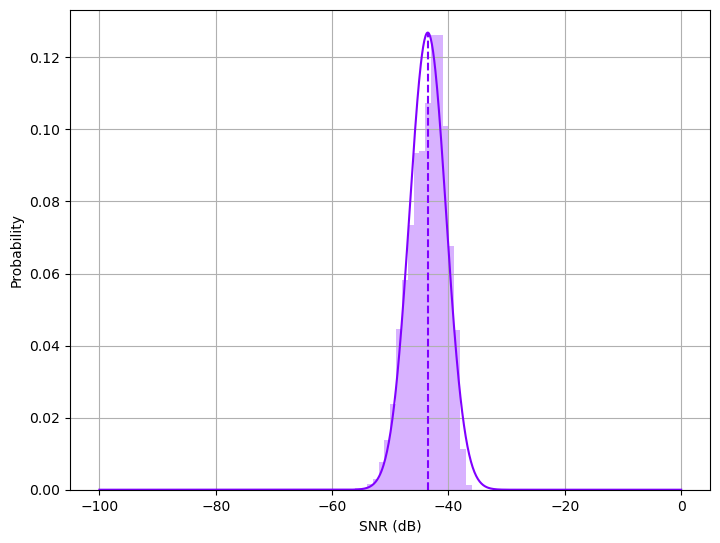

In [4]:
snr = dataset.get_snr(type = 'sine', ch_used_recog=suggested_ch(), display_progress = True)

hist_bins = list(range(-100,0+1))
hist_range = (-100, 0)

fig, ax = hist(snr, bins = hist_bins, range = hist_range, density = True,
            color = color, alpha = 0.3, fit_line = True, line_points = 1000,
            x_label = 'SNR (dB)',
            y_label = 'Probability',
            grid = True)
fig.savefig('res/SNR_sine_benchmark.jpg', bbox_inches='tight', dpi=300)